The persistence homology is used to analyze protein binding, comparing closed and open forms of the maltose-binding protein (MBP).

The distance between $i$ and $j$ is given by 
$$
    D_{ij} = 1 - |C_{ij}|,
$$
where $C_{ij}$ is the correlation metrices between residues.

In [1]:
import numpy as np
import gudhi as gd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
corr_protein_1 = pd.read_csv("Data/corr/0_mbp_closed/1anf.corr_1.txt",
                          header = None,
                          delim_whitespace=True)
# Distance defined as above

dist_protein_1 = 1 - np.abs(corr_protein_1.values)

In [8]:
# Rips complex, param = max_edge_length
rips_complex_1= gd.RipsComplex(distance_matrix=dist_protein_1, max_edge_length =1.1)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension=2)

In [9]:
result_str = 'Rips complex is of dimension ' + str(simplex_tree_1.dimension()) + ' - ' + str(simplex_tree_1.num_simplices()) + ' simplices - ' + str(simplex_tree_1.num_vertices()) + ' vertices.'
print(result_str)

Rips complex is of dimension 2 - 8442475 simplices - 370 vertices.


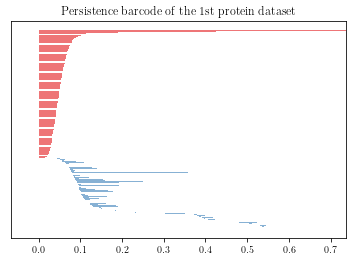

In [10]:
diag_1 = simplex_tree_1.persistence()
bar_1 = gd.plot_persistence_barcode(diag_1)
bar_1.set_title("Persistence barcode of the 1st protein dataset")
plt.show()

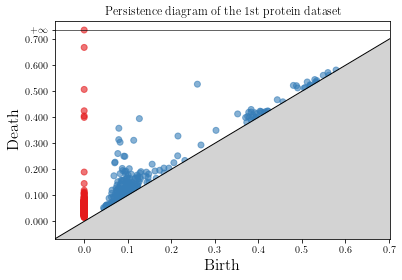

In [11]:
plt_1 = gd.plot_persistence_diagram(diag_1)
plt_1.set_title("Persistence diagram of the 1st protein dataset")
plt.show()

In [12]:
corr_protein_2 = pd.read_csv("Data/corr/0_mbp_closed/1fqc.corr_2.txt",
                          header = None,
                          delim_whitespace=True)
# Distance defined as above
dist_protein_2 = 1 - np.abs(corr_protein_2.values)
# Rips complex, param = max_edge_length
rips_complex_2 = gd.RipsComplex(distance_matrix=dist_protein_2, max_edge_length =1.1)
simplex_tree_2 = rips_complex_2.create_simplex_tree(max_dimension=2)

result_str_2 = 'Rips complex is of dimension ' + str(simplex_tree_2.dimension()) + ' - ' + str(simplex_tree_2.num_simplices()) + ' simplices - ' + str(simplex_tree_2.num_vertices()) + ' vertices.'
print(result_str_2)

Rips complex is of dimension 2 - 8442475 simplices - 370 vertices.


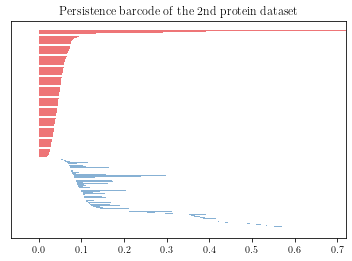

In [13]:
diag_2 = simplex_tree_2.persistence()
bar_2 = gd.plot_persistence_barcode(diag_2)
bar_2.set_title("Persistence barcode of the 2nd protein dataset")
plt.show()

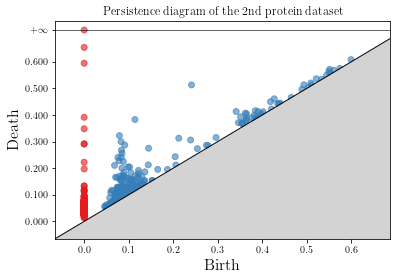

In [14]:
plt_2 = gd.plot_persistence_diagram(diag_2)
plt_2.set_title("Persistence diagram of the 2nd protein dataset")
plt.show()

In [15]:
interval_0_1 = simplex_tree_1.persistence_intervals_in_dimension(0)
interval_0_2 = simplex_tree_2.persistence_intervals_in_dimension(0)
bot0 = gd.bottleneck_distance(interval_0_1, interval_0_2)
print(bot0)
interval_1_1 = simplex_tree_1.persistence_intervals_in_dimension(1)
interval_1_2 = simplex_tree_2.persistence_intervals_in_dimension(1)
bot1 = gd.bottleneck_distance(interval_1_1, interval_1_2)
print(bot1)

0.10767523999999995
0.03666406


In [25]:
path_closed = "Data/corr/0_mbp_closed/"
filenames_closed = [
    "1anf.corr_1.txt",
    "1fqc.corr_2.txt",
    "1fqd.corr_3.txt",
    "1mpd.corr_4.txt",
    "3hpi.corr_5.txt",
    "3mbp.corr_6.txt",
    "4mbp.corr_7.txt",
]

path_open = "Data/corr/0_mbp_open/"
filenames_open = [
    "1ez9.corr_1.txt",
    "1fqa.corr_2.txt",
    "1fqb.corr_3.txt",
    "1jw4.corr_4.txt",
    "1jw5.corr_5.txt",
    "1lls.corr_6.txt",
    "1omp.corr_7.txt",
]

# Read all 14 files
corr_protein_list = [pd.read_csv(path_closed + name, header = None, delim_whitespace = True) for name in filenames_closed] + [pd.read_csv(path_open + name, header = None, delim_whitespace = True) for name in filenames_open]

In [38]:
# Compute the distance as defined
dist_protein_list = [1 - np.abs(corr) for corr in corr_protein_list]

In [42]:
# Create Rips Complex
max_edge_length = 1.1
max_dimension = 2
rips_complex_0 = gd.RipsComplex(distance_matrix = dist_protein_list[0].values, max_edge_length = max_edge_length)
simplex_tree_0 = rips_complex_0.create_simplex_tree(max_dimension = max_dimension)

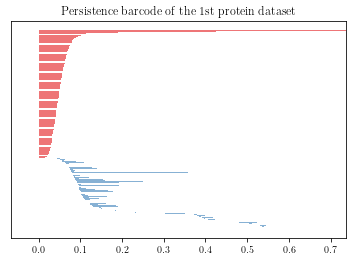

In [44]:
diag_0 = simplex_tree_0.persistence()
bar_0 = gd.plot_persistence_barcode(diag_0)
bar_0.set_title("Persistence barcode of the 1st protein dataset")
plt.show()

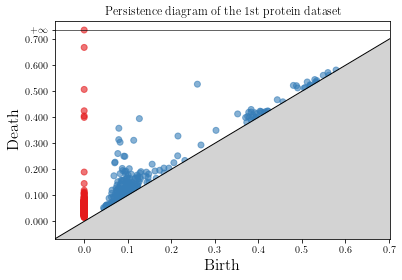

In [45]:
plt_0 = gd.plot_persistence_diagram(diag_0)
plt_0.set_title("Persistence diagram of the 1st protein dataset")
plt.show()

In [48]:
rips_filtration = simplex_tree_0.get_filtration()
filtration_list = list(rips_filtration)

In [49]:
print(len(filtration_list))

8442475


In [50]:
for simplex in filtration_list[350:400]:
    print(simplex)

([350], 0.0)
([351], 0.0)
([352], 0.0)
([353], 0.0)
([354], 0.0)
([355], 0.0)
([356], 0.0)
([357], 0.0)
([358], 0.0)
([359], 0.0)
([360], 0.0)
([361], 0.0)
([362], 0.0)
([363], 0.0)
([364], 0.0)
([365], 0.0)
([366], 0.0)
([367], 0.0)
([368], 0.0)
([369], 0.0)
([289, 290], 0.014988169999999967)
([45, 46], 0.016141790000000045)
([70, 71], 0.016186290000000048)
([211, 212], 0.019646410000000003)
([48, 49], 0.02002598)
([293, 294], 0.020196210000000048)
([50, 51], 0.02128167000000003)
([360, 361], 0.02139837)
([101, 102], 0.021894140000000006)
([43, 44], 0.022110460000000054)
([135, 136], 0.022791349999999988)
([240, 241], 0.023054660000000005)
([82, 83], 0.02376383999999998)
([355, 356], 0.023989579999999955)
([231, 232], 0.024279770000000034)
([350, 351], 0.02431161000000004)
([238, 239], 0.02514183000000003)
([16, 17], 0.025262099999999954)
([297, 298], 0.025565999999999978)
([287, 288], 0.025724140000000006)
([284, 285], 0.026689060000000042)
([46, 48], 0.027036240000000045)
([10, 38],

In [52]:
from sklearn.manifold import MDS
embedding = MDS(n_components = 2, dissimilarity = "precomputed")
X_transformed = embedding.fit_transform(dist_protein_list[0].values)

(370, 2)

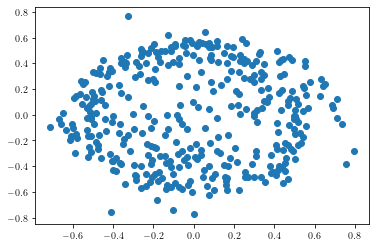

In [59]:
mds_fig = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], label="MDS")
plt.show()